1. Consider the two dimensional data matrix [(2, 1), (3, 4), (5, 0), (7, 6), (9, 2)].
Implement principal component analysis. Use this to obtain the feature in transformed
2D feature space. Plot the scatter plot of data points in both the original as well as
transformed domain.

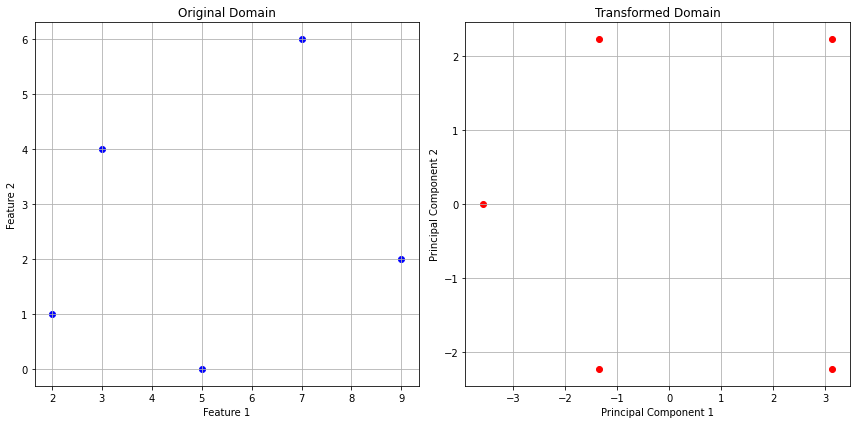

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data matrix
data_matrix = np.array([(2, 1), (3, 4), (5, 0), (7, 6), (9, 2)])

# Step 1: Compute the mean of each feature
mean_vector = np.mean(data_matrix, axis=0)

# Step 2: Subtract the mean from each data point
centered_data = data_matrix - mean_vector

# Step 3: Compute the covariance matrix
cov_matrix = np.cov(centered_data, rowvar=False)

# Step 4: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 5: Sort eigenvalues and corresponding eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Step 6: Choose the top k eigenvectors
k = 2  # Number of components to keep
top_k_eigenvectors = eigenvectors[:, :k]

# Step 7: Project the data onto the new subspace
transformed_data = np.dot(centered_data, top_k_eigenvectors)

# Plotting
plt.figure(figsize=(12, 6))

# Original domain
plt.subplot(1, 2, 1)
plt.scatter(data_matrix[:, 0], data_matrix[:, 1], color='blue')
plt.title('Original Domain')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)

# Transformed domain
plt.subplot(1, 2, 2)
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], color='red')
plt.title('Transformed Domain')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

plt.tight_layout()
plt.show()


2. Implement Principal Component Analysis Algorithm and use it to reduce dimensions
of Iris Dataset (from 4D to 2D). Plot the scatter plot for samples in the transformed
domain with different colour codes for samples belonging to different classes.

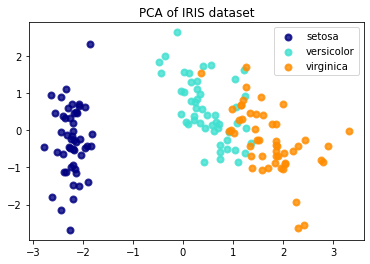

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Step 1: Normalize the data
X_normalized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Step 2: Compute the covariance matrix
cov_matrix = np.cov(X_normalized, rowvar=False)

# Step 3: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Step 5: Choose the top k eigenvectors
k = 2  # Number of components to keep
top_k_eigenvectors = eigenvectors[:, :k]

# Step 6: Project the data onto the new subspace
X_pca = np.dot(X_normalized, top_k_eigenvectors)

# Plotting
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.show()
